In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

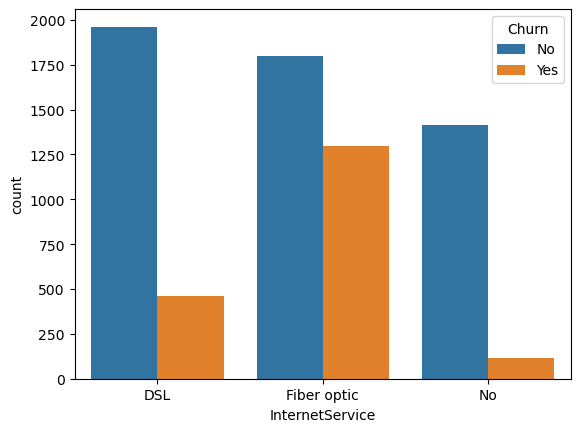

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='InternetService', hue='Churn')
plt.show()


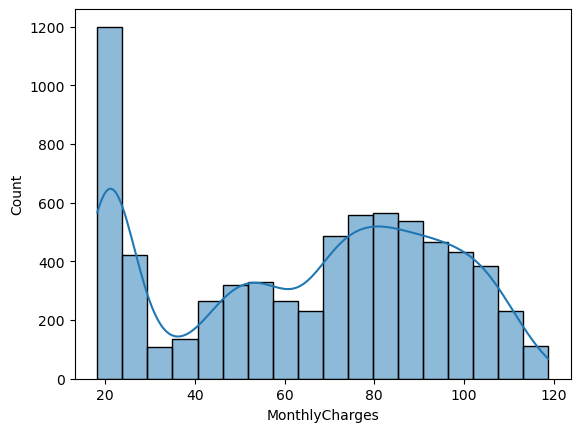

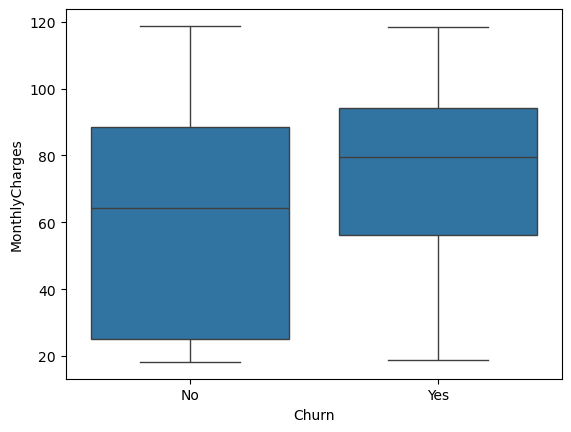

In [43]:
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.show()

sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.show()


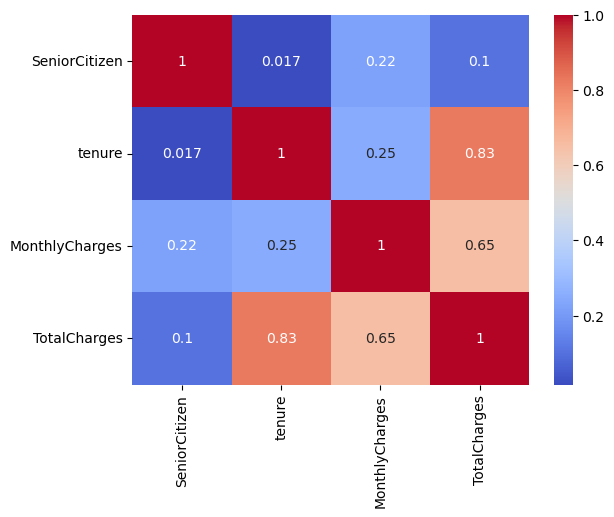

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.show()


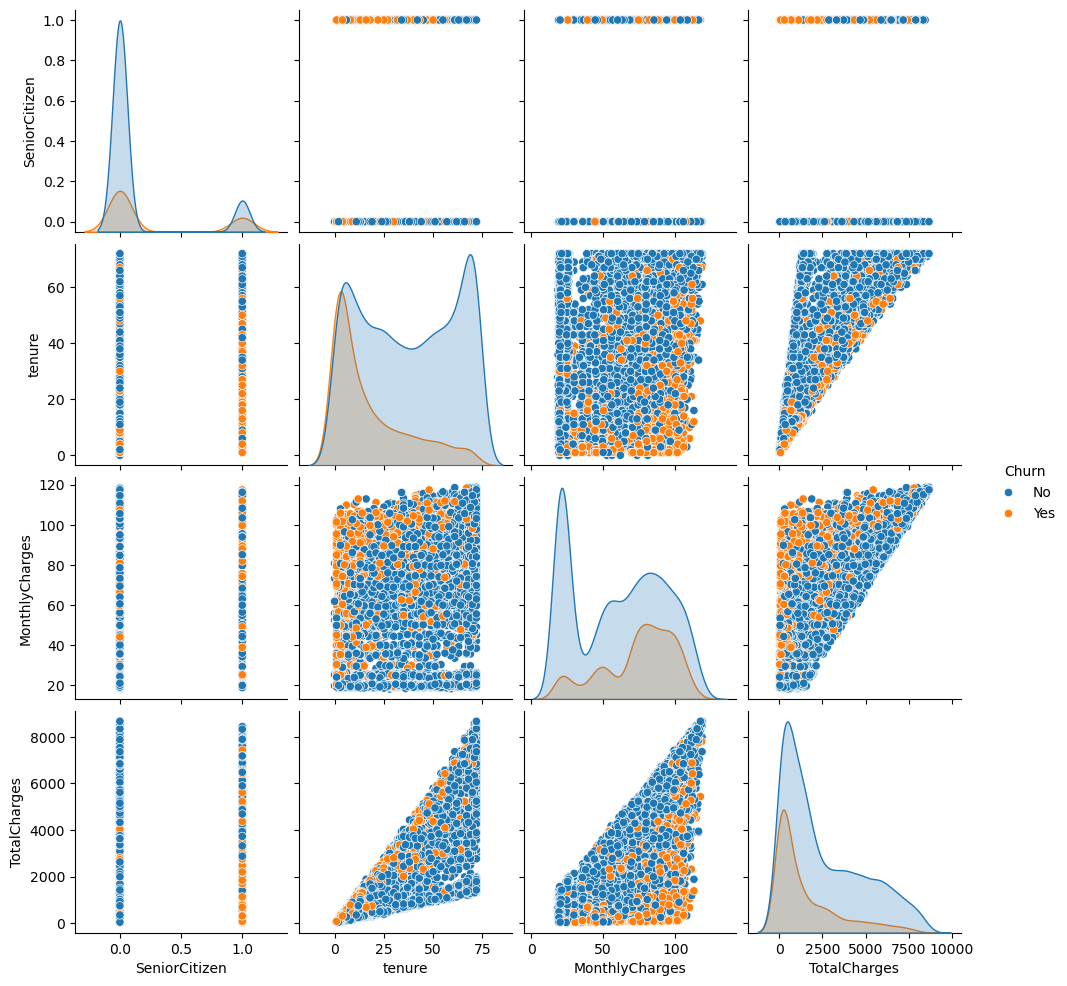

In [47]:
sns.pairplot(df[numeric_features + ['Churn']], hue='Churn')
plt.show()

<Axes: xlabel='Contract'>

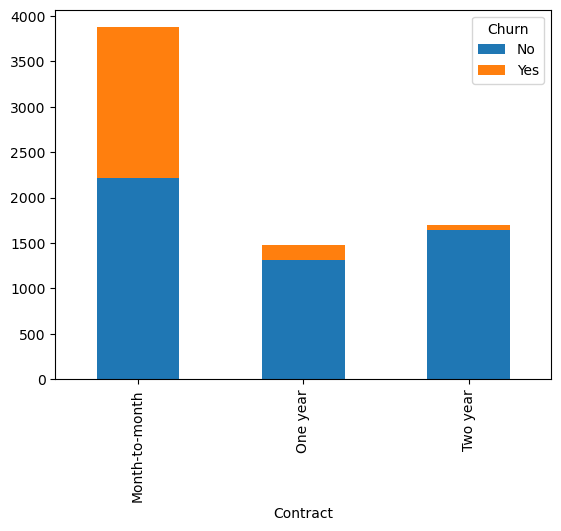

In [49]:
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', stacked=True)

<Axes: xlabel='tenure_bin'>

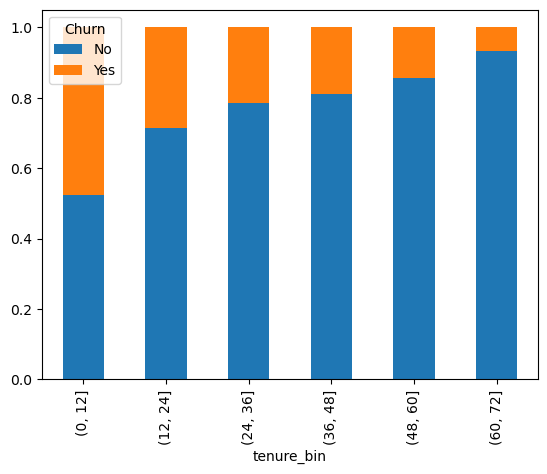

In [51]:
df['tenure_bin'] = pd.cut(df['tenure'], bins=[0,12,24,36,48,60,72])
df.groupby('tenure_bin')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

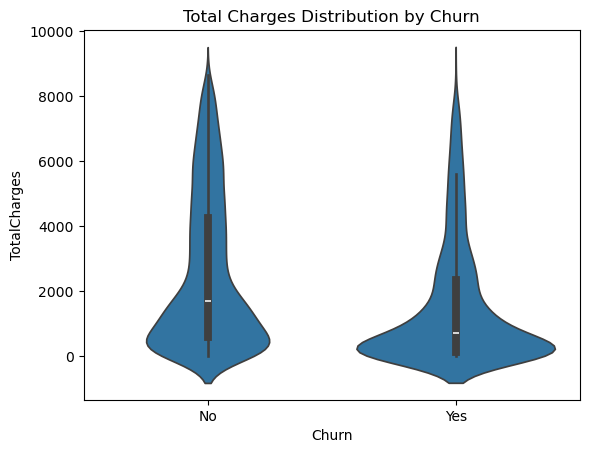

In [53]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

sns.violinplot(data=df, x='Churn', y='TotalCharges')
plt.title("Total Charges Distribution by Churn")
plt.show()


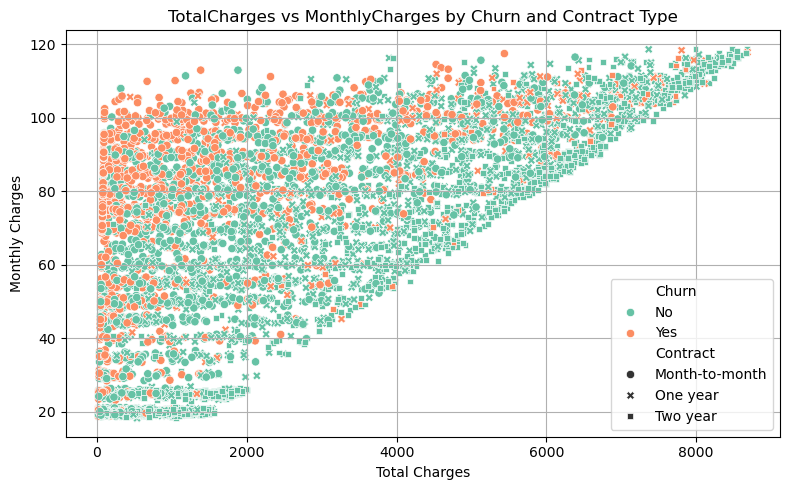

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure TotalCharges is numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='TotalCharges',
    y='MonthlyCharges',
    hue='Churn',
    style='Contract',   # Different shapes for different contract types
    palette='Set2'
)
plt.title("TotalCharges vs MonthlyCharges by Churn and Contract Type")
plt.xlabel("Total Charges")
plt.ylabel("Monthly Charges")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.drop('customerID', axis=1, inplace=True)

In [8]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=12)

In [10]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OHE
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

#Fit encoder
encoder.fit(x_train[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]])

#Transform
x_train_cat = encoder.transform(x_train[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]])
x_test_cat = encoder.transform(x_test[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]])

In [11]:
encoded_col = encoder.get_feature_names_out(["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"])
encoded_col

array(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'Payment

In [12]:
#Add new data to my X_train & test
x_train[encoded_col]= x_train_cat
x_test[encoded_col] = x_test_cat

In [13]:
x_train.drop(["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"],axis=1,inplace=True)

In [14]:
x_test.drop(["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"],axis=1,inplace=True)

In [15]:
from sklearn.preprocessing import MinMaxScaler
#Initialize MinMaxScaler
scalar = MinMaxScaler()

In [16]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier( 
    max_depth=7,
    min_samples_split=60,
    min_samples_leaf=10,
    ccp_alpha=0.01,
    random_state=42
)

model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=7, min_samples_leaf=10,
                       min_samples_split=60, random_state=42)

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
acc = accuracy_score(y_pred, y_test)
print("Accuracy score of model is",acc)

Accuracy score of model is 0.7863733144073811
